# Macro Factor Investing Model

## Quarterly Analysis

In [2]:
import pandas as pd 

In [3]:
New_Macro_Model = pd.read_csv('/Users/sanskritibajaj/Desktop/QuantechCap/NewMacroModelData.csv')

In [4]:
New_Macro_Model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quarter           4192 non-null   object 
 1   Date              4192 non-null   object 
 2   Nifty_500_Return  4192 non-null   float64
 3   Commodity_Index   4192 non-null   float64
 4   NEER              4192 non-null   float64
 5   10_Year_Yield     4192 non-null   float64
 6   CPI               4192 non-null   float64
 7   Nominal_GDP       4192 non-null   float64
 8   M2                4192 non-null   float64
dtypes: float64(7), object(2)
memory usage: 294.9+ KB


In [5]:
New_Macro_Model.head()

,Quarter,Date,Nifty_500_Return,Commodity_Index,NEER,10_Year_Yield,CPI,Nominal_GDP,M2
0,Q1-2021,31-Mar-21,-0.60,-0.07,0.30,0.55,-9.36,18.5,3.88
1,Q1-2021,30-Mar-21,1.97,1.76,-0.94,0.33,-9.36,18.5,3.88
2,Q1-2021,26-Mar-21,1.30,1.43,0.16,-0.13,-9.36,18.5,3.88
3,Q1-2021,25-Mar-21,-1.67,-1.82,0.16,-0.34,-9.36,18.5,3.88
4,Q1-2021,24-Mar-21,-1.77,-2.00,0.03,0.13,-9.36,18.5,3.88


In [6]:
New_Macro_Model['Date'] = pd.to_datetime(New_Macro_Model['Date'])
New_Macro_Model.set_index(['Quarter','Date'], inplace=True)

In [7]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

In [8]:
New_Macro_Model = sm.add_constant(New_Macro_Model)
New_Macro_Model.head()

const  Nifty_500_Return  Commodity_Index  NEER  \
Quarter Date                                                         
Q1-2021 2021-03-31    1.0             -0.60            -0.07  0.30   
        2021-03-30    1.0              1.97             1.76 -0.94   
        2021-03-26    1.0              1.30             1.43  0.16   
        2021-03-25    1.0             -1.67            -1.82  0.16   
        2021-03-24    1.0             -1.77            -2.00  0.03   

                    10_Year_Yield   CPI  Nominal_GDP    M2  
Quarter Date                                                
Q1-2021 2021-03-31           0.55 -9.36         18.5  3.88  
        2021-03-30           0.33 -9.36         18.5  3.88  
        2021-03-26          -0.13 -9.36         18.5  3.88  
        2021-03-25          -0.34 -9.36         18.5  3.88  
        2021-03-24           0.13 -9.36         18.5  3.88

In [9]:
#Regression Analysis
mod = PooledOLS(New_Macro_Model['Nifty_500_Return'], New_Macro_Model[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2']])
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:       Nifty_500_Return   R-squared:                        0.8834
Estimator:                  PooledOLS   R-squared (Between):              0.8798
No. Observations:                4192   R-squared (Within):               0.8835
Date:                Wed, Jul 07 2021   R-squared (Overall):              0.8834
Time:                        13:44:25   Log-likelihood                   -2906.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5285.9
Entities:                          69   P-value                           0.0000
Avg Obs:                       60.754   Distribution:                  F(6,4185)
Min Obs:                       57.000                                           
Max Obs:                       66.000   F-statistic (robust):             5285.9
                            

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt

In [11]:
Correlation_matrix = New_Macro_Model[['Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2']].corr()

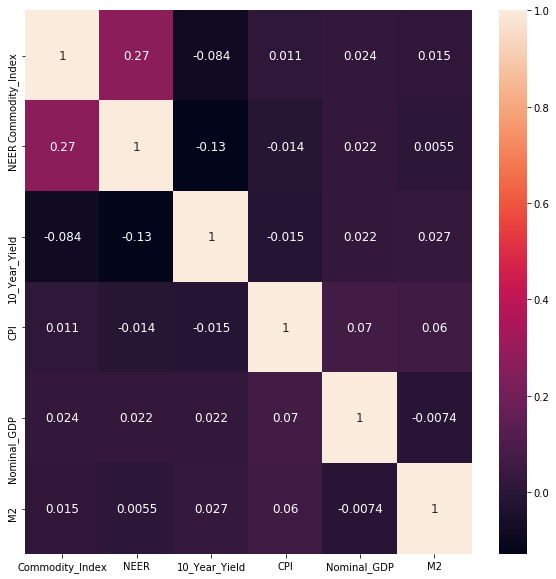

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(Correlation_matrix, annot=True, ax=ax, annot_kws={"size": 12})
plt.show()

In [13]:
import statsmodels.api as smf

In [14]:
#Checking OLS regression to compare results to PooledOLS
reg1 = smf.OLS(New_Macro_Model['Nifty_500_Return'], New_Macro_Model[['Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2']], missing='drop').fit()
print(reg1.summary())

                                 OLS Regression Results                                
Dep. Variable:       Nifty_500_Return   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              5294.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                        0.00
Time:                        13:44:26   Log-Likelihood:                         -2907.3
No. Observations:                4192   AIC:                                      5827.
Df Residuals:                    4186   BIC:                                      5865.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [15]:
#Collecting Quarters in a separate dateframe to set regression for each quarter
col_name = ["Quarter"]
Quarter_df = pd.read_csv('/Users/sanskritibajaj/Desktop/QuantechCap/NewMacroModelData.csv', usecols=col_name)
Quarter_df.drop_duplicates(keep="first", inplace=True)
Quarter_df.reset_index(drop=True,inplace=True)
Q_R2 = New_Macro_Model.loc[(Quarter_df.iloc[0])]
reg2 = smf.OLS(Q_R2['Nifty_500_Return'], Q_R2[['Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2']], missing='drop').fit()


In [16]:
#Running regression for each quarter
List_R2 = []
for i in range(69):
    Quarterly_R2 = New_Macro_Model.loc[(Quarter_df.iloc[i])]     
    reg2 = smf.OLS(Quarterly_R2['Nifty_500_Return'], Quarterly_R2[['Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2']], missing='drop').fit()
    List_R2.append(reg2.rsquared)
print(List_R2[2])

0.7919322330759508


In [17]:
from matplotlib import pylab
from pylab import *

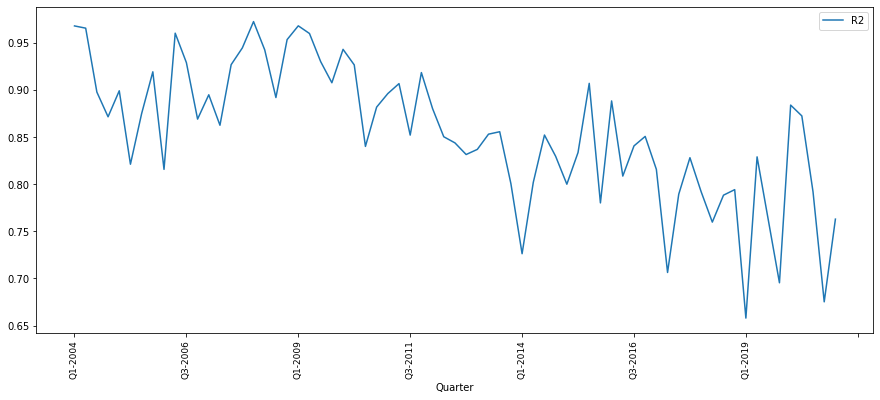

In [18]:
#Plotting R2 for each quarter 
Quarter_df["R2"] = List_R2
Quarter_df.head()
Quarter_df_new = Quarter_df.iloc[::-1]
Quarter_df_new.plot(kind = "line",x = 'Quarter', y = 'R2', figsize=(15,6))
plt.xticks(rotation=90, fontsize=9)
plt.show()


In [19]:
#Running T-stat analysis for Commodity feature
List_T_stat_Commodity = []
for i in range(69):
    Quarterly_T_stat = New_Macro_Model.loc[(Quarter_df.iloc[i])]     
    reg3 = smf.OLS(Quarterly_T_stat['Nifty_500_Return'], Quarterly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2']], missing='drop').fit()
    List_T_stat_Commodity.append(reg3.tvalues['Commodity_Index'])

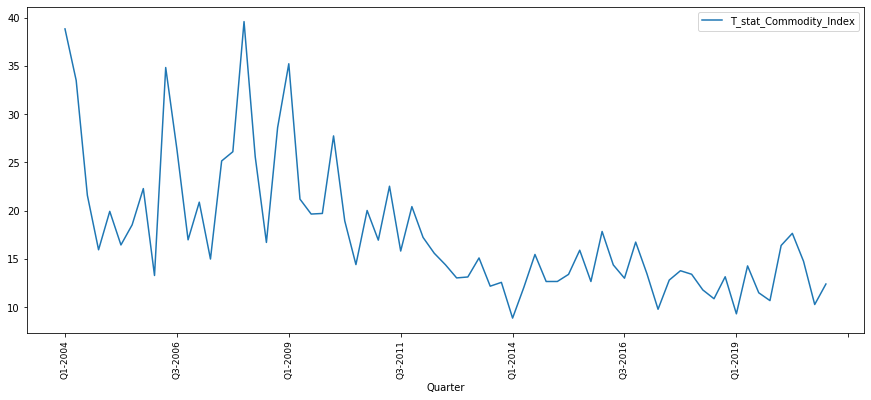

In [20]:
#Plotting T-stat analysis for Commodity feature
Quarter_df["T_stat_Commodity_Index"] = List_T_stat_Commodity
Quarter_df.head()
Quarter_df_new = Quarter_df.iloc[::-1]
Quarter_df_new.plot(kind = "line",x = 'Quarter', y = 'T_stat_Commodity_Index', figsize=(15,6))
plt.xticks(rotation=90, fontsize=9)
fig.tight_layout()
plt.show()

In [21]:
#Running T-stat analysis for NEER feature
List_T_stat_NEER = []
for i in range(69):
    Quarterly_T_stat = New_Macro_Model.loc[(Quarter_df.iloc[i])]     
    reg3 = smf.OLS(Quarterly_T_stat['Nifty_500_Return'], Quarterly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2']], missing='drop').fit()
    List_T_stat_NEER.append(reg3.tvalues['NEER'])
Quarter_df["T_stat_NEER"] = List_T_stat_NEER

In [22]:
#Running T-stat analysis for 10-year-yield feature
List_T_stat_10year = []
for i in range(69):
    Quarterly_T_stat = New_Macro_Model.loc[(Quarter_df.iloc[i])]     
    reg3 = smf.OLS(Quarterly_T_stat['Nifty_500_Return'], Quarterly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2']], missing='drop').fit()
    List_T_stat_10year.append(reg3.tvalues['10_Year_Yield'])
Quarter_df["T_stat_10_year_yield"] = List_T_stat_10year

In [23]:
#Running T-stat analysis for CPI feature
List_T_stat_CPI = []
for i in range(69):
    Quarterly_T_stat = New_Macro_Model.loc[(Quarter_df.iloc[i])]     
    reg3 = smf.OLS(Quarterly_T_stat['Nifty_500_Return'], Quarterly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2']], missing='drop').fit()
    List_T_stat_CPI.append(reg3.tvalues['CPI'])
Quarter_df["T_stat_CPI"] = List_T_stat_CPI

In [24]:
#Running T-stat analysis for Nominal GDP feature
List_T_stat_Nominal_GDP = []
for i in range(69):
    Quarterly_T_stat = New_Macro_Model.loc[(Quarter_df.iloc[i])]     
    reg3 = smf.OLS(Quarterly_T_stat['Nifty_500_Return'], Quarterly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2']], missing='drop').fit()
    List_T_stat_Nominal_GDP.append(reg3.tvalues['Nominal_GDP'])
Quarter_df["T_stat_Nominal_GDP"] = List_T_stat_Nominal_GDP

In [25]:
#Running T-stat analysis for M2 feature
List_T_stat_M2 = []
for i in range(69):
    Quarterly_T_stat = New_Macro_Model.loc[(Quarter_df.iloc[i])]     
    reg3 = smf.OLS(Quarterly_T_stat['Nifty_500_Return'], Quarterly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2']], missing='drop').fit()
    List_T_stat_M2.append(reg3.tvalues['M2'])
Quarter_df["T_stat_M2"] = List_T_stat_M2

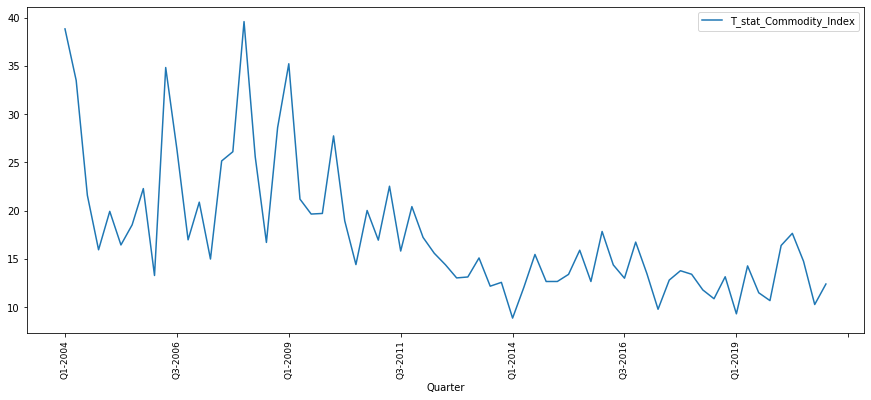

In [26]:
#Plotting T-stat analysis for Commodity feature
Quarter_df["T_stat_Commodity_Index"] = List_T_stat_Commodity
Quarter_df.head()
Quarter_df_new = Quarter_df.iloc[::-1]
Quarter_df_new.plot(kind = "line",x = 'Quarter', y = 'T_stat_Commodity_Index', figsize=(15,6))
plt.xticks(rotation=90, fontsize=9)
fig.tight_layout()
plt.show()

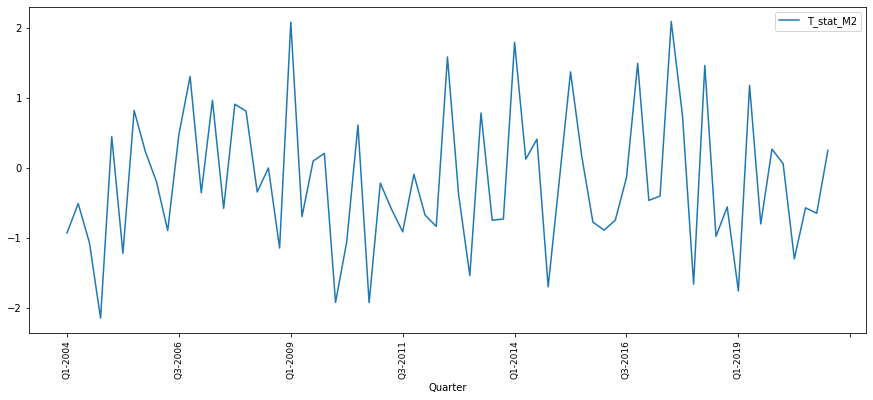

In [27]:
#Plotting T-stat analysis for M2 feature
Quarter_df.head()
Quarter_df_new_2 = Quarter_df.iloc[::-1]
Quarter_df_new_2.plot(kind = "line",x = 'Quarter', y = 'T_stat_M2', figsize=(15,6))
plt.xticks(rotation=90, fontsize=9)
fig.tight_layout()
plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

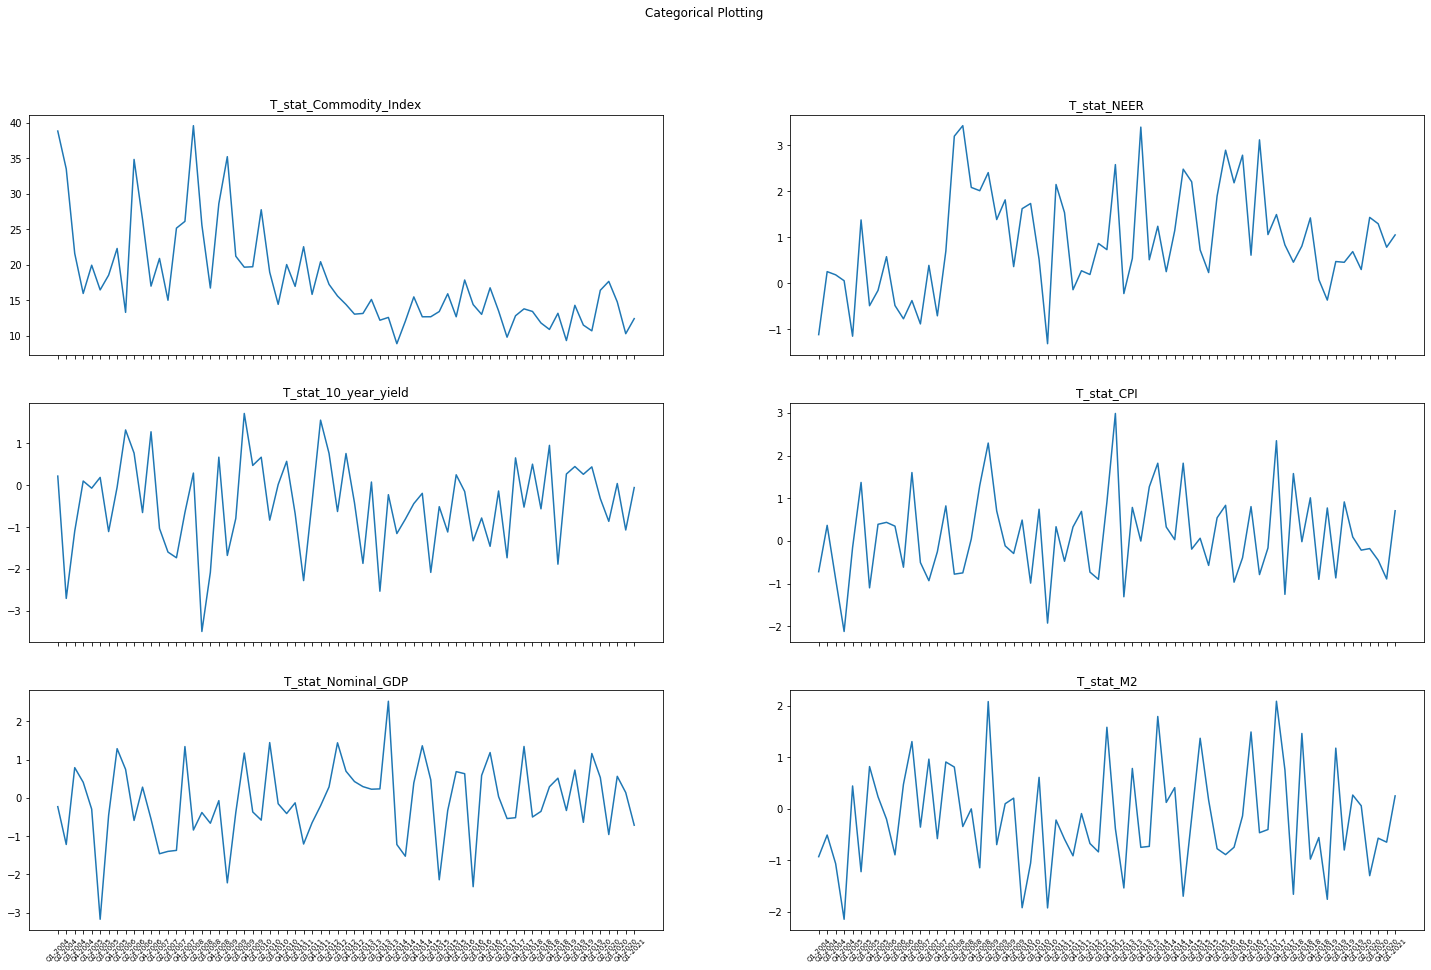

In [28]:
# Generating a combined plot for T-stat analysis
fig, axs = plt.subplots(3, 2, figsize=(25, 15), sharex=True)
axs = axs.flatten()
axs[0].plot(Quarter_df_new_2.Quarter , Quarter_df_new_2.T_stat_Commodity_Index)
axs[0].set_title('T_stat_Commodity_Index')
axs[1].plot(Quarter_df_new_2.Quarter, Quarter_df_new_2.T_stat_NEER)
axs[1].set_title('T_stat_NEER')
axs[2].plot(Quarter_df_new_2.Quarter, Quarter_df_new_2.T_stat_10_year_yield)
axs[2].set_title('T_stat_10_year_yield')
axs[3].plot(Quarter_df_new_2.Quarter, Quarter_df_new_2.T_stat_CPI)
axs[3].set_title('T_stat_CPI')
axs[4].plot(Quarter_df_new_2.Quarter, Quarter_df_new_2.T_stat_Nominal_GDP)
axs[4].set_title('T_stat_Nominal_GDP')
axs[4].tick_params(axis='x', rotation=45, labelsize = 7)
axs[5].plot(Quarter_df_new_2.Quarter, Quarter_df_new_2.T_stat_M2)
axs[5].tick_params(axis='x', rotation=45, labelsize = 7)
axs[5].set_title('T_stat_M2')
fig.suptitle('Categorical Plotting')

In [29]:
#Quarterly analysis of parameters 
Quarter_df_new_2.head()

,Quarter,R2,T_stat_Commodity_Index,T_stat_NEER,T_stat_10_year_yield,T_stat_CPI,T_stat_Nominal_GDP,T_stat_M2
68,Q1-2004,0.967928,38.849329,-1.120920,0.217581,-0.719634,-0.227284,-0.928796
67,Q2-2004,0.965555,33.505998,0.251223,-2.701227,0.367080,-1.215875,-0.508852
66,Q3-2004,0.897733,21.592154,0.181691,-1.095716,-0.890729,0.793310,-1.063578
65,Q4-2004,0.871527,15.949723,0.053051,0.100263,-2.121106,0.410588,-2.143853
64,Q1-2005,0.899134,19.933428,-1.155654,-0.070763,-0.152876,-0.293212,0.443946


## Yearly Regression

In [30]:
Yearly_Macro_Model = pd.read_csv('/Users/sanskritibajaj/Desktop/QuantechCap/YearlyNewMacroModel.csv')

In [31]:
Yearly_Macro_Model['const'] = 1
Yearly_Macro_Model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              4133 non-null   object 
 1   Quarter           4133 non-null   object 
 2   Date              4133 non-null   object 
 3   Nifty_500_Return  4133 non-null   float64
 4   Commodity_Index   4133 non-null   float64
 5   NEER              4133 non-null   float64
 6   10_Year_Yield     4133 non-null   float64
 7   CPI               4133 non-null   float64
 8   Nominal_GDP       4133 non-null   float64
 9   M2                4133 non-null   float64
 10  FII_Inflows       4133 non-null   float64
 11  Fiscal_Deficit    4133 non-null   float64
 12  const             4133 non-null   int64  
dtypes: float64(9), int64(1), object(3)
memory usage: 419.9+ KB


In [32]:
Yearly_Macro_Model['Date'] = pd.to_datetime(Yearly_Macro_Model['Date'])
Yearly_Macro_Model.set_index(['Year','Date'], inplace=True)
Yearly_Macro_Model.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4133 entries, ('2020-21', Timestamp('2021-03-31 00:00:00')) to ('2004-05', Timestamp('2004-04-01 00:00:00'))
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quarter           4133 non-null   object 
 1   Nifty_500_Return  4133 non-null   float64
 2   Commodity_Index   4133 non-null   float64
 3   NEER              4133 non-null   float64
 4   10_Year_Yield     4133 non-null   float64
 5   CPI               4133 non-null   float64
 6   Nominal_GDP       4133 non-null   float64
 7   M2                4133 non-null   float64
 8   FII_Inflows       4133 non-null   float64
 9   Fiscal_Deficit    4133 non-null   float64
 10  const             4133 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 399.8+ KB


In [33]:
#Running PooledOLS regression over panel data
#PooledOLs and OLS regression will lead to the same result
mod_1 = PooledOLS(Yearly_Macro_Model['Nifty_500_Return'], Yearly_Macro_Model[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2', 'FII_Inflows','Fiscal_Deficit']])
pooled_res_1 = mod_1.fit()
print(pooled_res_1)

                          PooledOLS Estimation Summary                          
Dep. Variable:       Nifty_500_Return   R-squared:                        0.8813
Estimator:                  PooledOLS   R-squared (Between):              0.8747
No. Observations:                4133   R-squared (Within):               0.8814
Date:                Wed, Jul 07 2021   R-squared (Overall):              0.8813
Time:                        13:44:31   Log-likelihood                   -2874.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3827.6
Entities:                          17   P-value                           0.0000
Avg Obs:                       243.12   Distribution:                  F(8,4124)
Min Obs:                       237.00                                           
Max Obs:                       249.00   F-statistic (robust):             3827.6
                            

In [34]:
# Retreving years as a separate dataframe
col_name = ["Year"]
Yearly_df = pd.read_csv('/Users/sanskritibajaj/Desktop/QuantechCap/YearlyNewMacroModel.csv', usecols=col_name)
Yearly_df.drop_duplicates(keep="first", inplace=True)
Yearly_df.reset_index(drop=True,inplace=True)
Yearly_df.dropna(axis=0, inplace=True)
print(Yearly_df)

       Year
0   2020-21
1   2019-20
2   2018-19
3   2017-18
4   2016-17
5   2015-16
6   2014-15
7   2013-14
8   2012-13
9   2011-12
10  2010-11
11  2009-10
12  2008-09
13  2007-08
14  2006-07
15  2005-06
16  2004-05


In [35]:
# Running R2 analysis for yearly data 
List_R3 = []
for i in range(17):
    Yearly_R2 = Yearly_Macro_Model.loc[(Yearly_df.iloc[i])]     
    reg6 = smf.OLS(Yearly_R2['Nifty_500_Return'], Yearly_R2[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']], missing='drop').fit()
    List_R3.append(reg6.rsquared)
print(List_R3)

[0.8044115773082307, 0.8406289000467047, 0.7424646646708002, 0.77250488072846, 0.8183223069754458, 0.8632688214188399, 0.7949742071366587, 0.8104437172955832, 0.8286568628415225, 0.8808430403958191, 0.8839664944143335, 0.9414736473634409, 0.933373229099195, 0.9492165261582609, 0.9296772640599353, 0.8522165892738041, 0.9336936225308968]


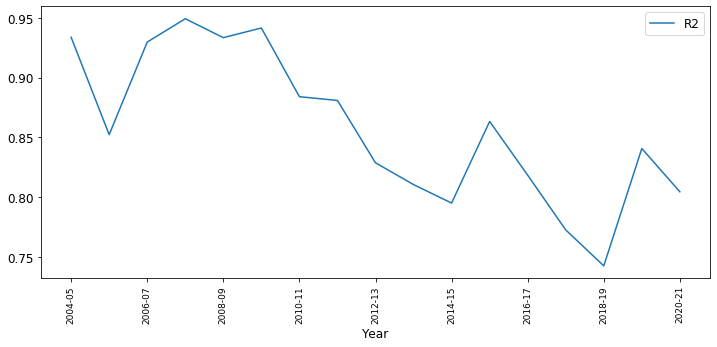

In [104]:
#R2 plot over the years
Yearly_df['R2'] = List_R3
Yearly_df.head()
Yearly_df_new = Yearly_df.iloc[::-1]
Yearly_df_new.plot(kind = "line",x = 'Year', y = 'R2', figsize=(12,5))
plt.xticks(rotation=90, fontsize=9)
plt.show()


In [103]:
Yearly_df.head(17)

,Year,R2,T_stat_Commodity_Yearly,T_stat_NEER_Yearly,T_stat_10_Year_Yield_Yearly,T_stat_CPI_Yearly,T_stat_Nominal_GDP_Yearly,T_stat_M2_Yearly,T_stat_FII_Inflows_Yearly,T_stat_Fiscal_Deficit_Yearly
0,2020-21,0.804412,29.810500,2.354486,-1.142080,-0.162768,-0.893746,-0.777896,-1.851956,0.382986
1,2019-20,0.840629,31.334105,0.396127,-0.461805,-0.363835,1.097498,1.109190,0.262557,1.330491
2,2018-19,0.742465,23.497214,1.141876,-1.044188,-0.364998,0.568563,-1.588045,2.198535,-0.778844
3,2017-18,0.772505,25.692272,1.822220,-0.488282,0.780691,-0.602948,0.940565,2.909809,0.173800
4,2016-17,0.818322,30.159379,4.372908,-1.402903,0.178378,0.170962,1.531750,1.309162,0.009183
5,2015-16,0.863269,31.929906,3.247167,-0.842272,1.673105,-1.058230,-0.045714,-1.213559,1.518958
6,2014-15,0.794974,26.438420,2.712882,-2.031985,0.945714,-0.116974,-1.990702,1.163149,-0.522325
7,2013-14,0.810444,24.154782,4.214320,-3.018542,-0.311225,0.607209,-0.024364,0.770792,-1.765558
8,2012-13,0.828657,29.890701,2.083095,-0.240519,1.014377,1.406185,1.519091,-1.573752,0.258522
9,2011-12,0.880843,37.697942,0.490243,0.647893,0.533736,-0.856056,-0.953344,-0.390502,0.646042


In [37]:
List_T_stat_Commodity_Yearly = []
for i in range(17):
    Yearly_T_stat = Yearly_Macro_Model.loc[(Yearly_df.iloc[i])]     
    reg8 = smf.OLS(Yearly_T_stat['Nifty_500_Return'], Yearly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']], missing='drop').fit()
    List_T_stat_Commodity_Yearly.append(reg8.tvalues['Commodity_Index'])
Yearly_df["T_stat_Commodity_Yearly"] = List_T_stat_Commodity_Yearly

In [38]:
List_T_stat_NEER_Yearly = []
for i in range(17):
    Yearly_T_stat = Yearly_Macro_Model.loc[(Yearly_df.iloc[i])]     
    reg9 = smf.OLS(Yearly_T_stat['Nifty_500_Return'], Yearly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']], missing='drop').fit()
    List_T_stat_NEER_Yearly.append(reg9.tvalues['NEER'])
Yearly_df["T_stat_NEER_Yearly"] = List_T_stat_NEER_Yearly

In [39]:
List_T_stat_10_Year_Yield_Yearly = []
for i in range(17):
    Yearly_T_stat = Yearly_Macro_Model.loc[(Yearly_df.iloc[i])]     
    reg9 = smf.OLS(Yearly_T_stat['Nifty_500_Return'], Yearly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']], missing='drop').fit()
    List_T_stat_10_Year_Yield_Yearly.append(reg9.tvalues['10_Year_Yield'])
Yearly_df["T_stat_10_Year_Yield_Yearly"] = List_T_stat_10_Year_Yield_Yearly

In [40]:
List_T_stat_CPI_Yearly = []
for i in range(17):
    Yearly_T_stat = Yearly_Macro_Model.loc[(Yearly_df.iloc[i])]     
    reg9 = smf.OLS(Yearly_T_stat['Nifty_500_Return'], Yearly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']], missing='drop').fit()
    List_T_stat_CPI_Yearly.append(reg9.tvalues['CPI'])
Yearly_df["T_stat_CPI_Yearly"] = List_T_stat_CPI_Yearly

In [41]:
List_T_stat_Nominal_GDP_Yearly = []
for i in range(17):
    Yearly_T_stat = Yearly_Macro_Model.loc[(Yearly_df.iloc[i])]     
    reg9 = smf.OLS(Yearly_T_stat['Nifty_500_Return'], Yearly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']], missing='drop').fit()
    List_T_stat_Nominal_GDP_Yearly.append(reg9.tvalues['Nominal_GDP'])
Yearly_df["T_stat_Nominal_GDP_Yearly"] = List_T_stat_Nominal_GDP_Yearly

In [42]:
List_T_stat_M2_Yearly = []
for i in range(17):
    Yearly_T_stat = Yearly_Macro_Model.loc[(Yearly_df.iloc[i])]     
    reg9 = smf.OLS(Yearly_T_stat['Nifty_500_Return'], Yearly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']], missing='drop').fit()
    List_T_stat_M2_Yearly.append(reg9.tvalues['M2'])
Yearly_df["T_stat_M2_Yearly"] = List_T_stat_M2_Yearly

In [43]:
List_T_stat_FII_Inflows_Yearly = []
for i in range(17):
    Yearly_T_stat = Yearly_Macro_Model.loc[(Yearly_df.iloc[i])]     
    reg9 = smf.OLS(Yearly_T_stat['Nifty_500_Return'], Yearly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']], missing='drop').fit()
    List_T_stat_FII_Inflows_Yearly.append(reg9.tvalues['FII_Inflows'])
Yearly_df["T_stat_FII_Inflows_Yearly"] = List_T_stat_FII_Inflows_Yearly

In [44]:
List_T_stat_Fiscal_Deficit_Yearly = []
for i in range(17):
    Yearly_T_stat = Yearly_Macro_Model.loc[(Yearly_df.iloc[i])]     
    reg9 = smf.OLS(Yearly_T_stat['Nifty_500_Return'], Yearly_T_stat[['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']], missing='drop').fit()
    List_T_stat_Fiscal_Deficit_Yearly.append(reg9.tvalues['Fiscal_Deficit'])
Yearly_df["T_stat_Fiscal_Deficit_Yearly"] = List_T_stat_Fiscal_Deficit_Yearly

In [45]:
#Yearly analysis of model paramaters 
Yearly_df.head()
Yearly_df_new_2 = Yearly_df.iloc[::-1] #postioning data in chronologic order 
Yearly_df_new_2.head()

,Year,R2,T_stat_Commodity_Yearly,T_stat_NEER_Yearly,T_stat_10_Year_Yield_Yearly,T_stat_CPI_Yearly,T_stat_Nominal_GDP_Yearly,T_stat_M2_Yearly,T_stat_FII_Inflows_Yearly,T_stat_Fiscal_Deficit_Yearly
16,2004-05,0.933694,56.629086,-0.222685,-2.411278,-1.440241,0.139591,-1.010673,-0.941833,-0.913417
15,2005-06,0.852217,36.320882,0.600654,-0.362942,-0.621859,-0.757172,-0.484893,1.655716,-0.595546
14,2006-07,0.929677,55.146622,-0.833070,-0.384670,-1.261289,-1.056885,0.077719,-0.373114,-1.807058
13,2007-08,0.949217,63.033037,2.398836,-2.173445,-1.135783,-1.064016,-0.656067,0.259627,-0.270001
12,2008-09,0.933373,51.967805,4.622988,-1.714309,0.540485,-1.048839,0.195892,0.343193,-0.028802


Text(0.5, 1.0, 'T_stat_M2_Yearly')

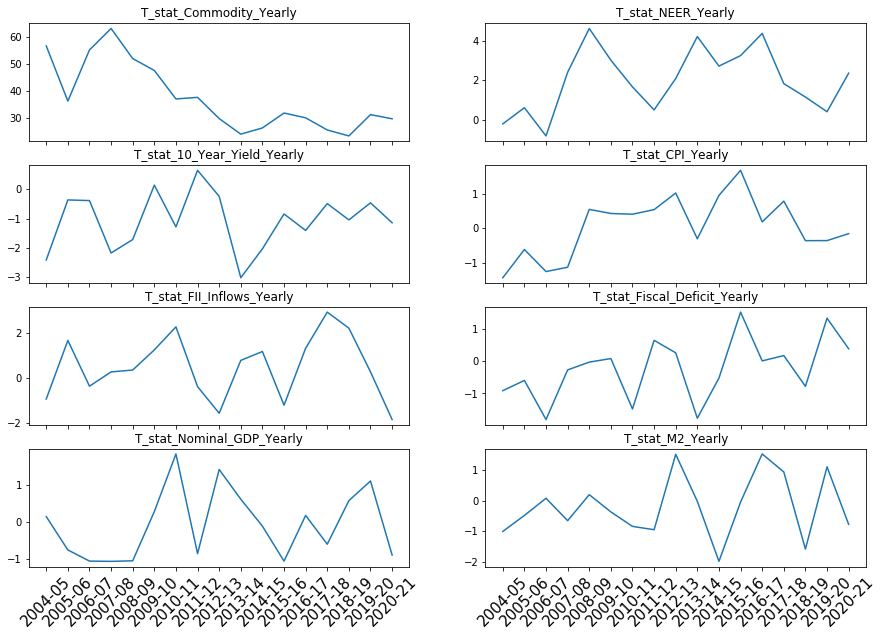

In [46]:
#Generating combined T-stat plot
fig, axs = plt.subplots(4, 2, figsize=(15,10), sharex=True)
axs = axs.flatten()
axs[0].plot(Yearly_df_new_2.Year , Yearly_df_new_2.T_stat_Commodity_Yearly)
axs[0].set_title('T_stat_Commodity_Yearly')
axs[1].plot(Yearly_df_new_2.Year, Yearly_df_new_2.T_stat_NEER_Yearly)
axs[1].set_title('T_stat_NEER_Yearly')
axs[2].plot(Yearly_df_new_2.Year, Yearly_df_new_2.T_stat_10_Year_Yield_Yearly)
axs[2].set_title('T_stat_10_Year_Yield_Yearly')
axs[3].plot(Yearly_df_new_2.Year, Yearly_df_new_2.T_stat_CPI_Yearly)
axs[3].set_title('T_stat_CPI_Yearly')
axs[4].plot(Yearly_df_new_2.Year, Yearly_df_new_2.T_stat_FII_Inflows_Yearly)
axs[4].set_title('T_stat_FII_Inflows_Yearly')
axs[5].plot(Yearly_df_new_2.Year, Yearly_df_new_2.T_stat_Fiscal_Deficit_Yearly)
axs[5].set_title('T_stat_Fiscal_Deficit_Yearly')
axs[6].plot(Yearly_df_new_2.Year, Yearly_df_new_2.T_stat_Nominal_GDP_Yearly)
axs[6].set_title('T_stat_Nominal_GDP_Yearly')
axs[6].tick_params(axis='x', rotation=45, labelsize = 15)
axs[7].plot(Yearly_df_new_2.Year, Yearly_df_new_2.T_stat_M2_Yearly)
axs[7].tick_params(axis='x', rotation=45, labelsize = 15)
axs[7].set_title('T_stat_M2_Yearly')

# Cross Validation

## Split into test and train 

In [47]:
Yearly_Macro_Model.shape

(4133, 11)

In [48]:
Yearly_Macro_Model.head()

Quarter  Nifty_500_Return  Commodity_Index  NEER  \
Year    Date                                                           
2020-21 2021-03-31  Q1-2021             -0.60            -0.07  0.30   
        2021-03-30  Q1-2021              1.97             1.76 -0.94   
        2021-03-26  Q1-2021              1.30             1.43  0.16   
        2021-03-25  Q1-2021             -1.67            -1.82  0.16   
        2021-03-24  Q1-2021             -1.77            -2.00  0.03   

                    10_Year_Yield   CPI  Nominal_GDP    M2  FII_Inflows  \
Year    Date                                                              
2020-21 2021-03-31           0.55 -9.36         18.5  3.88      -114.96   
        2021-03-30           0.33 -9.36         18.5  3.88      -114.96   
        2021-03-26          -0.13 -9.36         18.5  3.88      -114.96   
        2021-03-25          -0.34 -9.36         18.5  3.88      -114.96   
        2021-03-24           0.13 -9.36         18.5  3.88      -114.96   

                    Fiscal_Deficit  const  
Year    Date                               
2020-21 2021-03-31         -142.45      1  
        2021-03-30         -142.45      1  
        2021-03-26         -142.45      1  
        2021-03-25         -142.45      1  
        2021-03-24         -142.45      1

In [49]:
#aggregating data per year
new_data = Yearly_Macro_Model.groupby(['Year']).mean()

In [50]:
import statsmodels.api as sm

In [51]:
feature_names = ['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']
features = Yearly_Macro_Model[feature_names] #setting X variables
targets = Yearly_Macro_Model['Nifty_500_Return'] #setting y variable
train_size = int(0.50*targets.shape[0]) #50% data set as training data 
train_features = features[train_size:] #slicing training features 
train_targets = targets[train_size:] #slicing training target
test_features = features[:train_size] #slicing testing features 
test_targets = targets[:train_size] #slicing testing targets 

In [52]:
#setting up pooledOLS regression model from training data
mod_1 = PooledOLS(train_targets,train_features)
pooled_res_1 = mod_1.fit()
print(pooled_res_1)

                          PooledOLS Estimation Summary                          
Dep. Variable:       Nifty_500_Return   R-squared:                        0.9216
Estimator:                  PooledOLS   R-squared (Between):              0.8702
No. Observations:                2067   R-squared (Within):               0.9219
Date:                Wed, Jul 07 2021   R-squared (Overall):              0.9216
Time:                        13:44:33   Log-likelihood                   -1358.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3022.5
Entities:                           9   P-value                           0.0000
Avg Obs:                       229.67   Distribution:                  F(8,2058)
Min Obs:                       117.00                                           
Max Obs:                       249.00   F-statistic (robust):             3022.5
                            

In [53]:
#Checking if pooledOLS results are the same as OLS results
model = sm.OLS(train_targets,train_features)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Nifty_500_Return   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     3023.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:44:33   Log-Likelihood:                -1358.5
No. Observations:                2067   AIC:                             2735.
Df Residuals:                    2058   BIC:                             2786.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0385      0.040     

In [54]:
#Checking p-value of paramaters 
print(results.pvalues)

const              3.335061e-01
Commodity_Index    0.000000e+00
NEER               1.662720e-09
10_Year_Yield      1.101424e-04
CPI                3.439825e-01
Nominal_GDP        7.502182e-01
M2                 7.330365e-02
FII_Inflows        5.791250e-01
Fiscal_Deficit     1.262586e-01
dtype: float64


In [55]:
# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)
train_predictions = train_predictions.to_frame(name='actual_index_value')
test_predictions =  test_predictions.to_frame(name='predicted_index_value')
test_predictions.groupby(['Year']).mean()
new_data['Predicted_Index_Value'] = test_predictions.groupby(['Year']).mean() #Add predicted values to original data set 

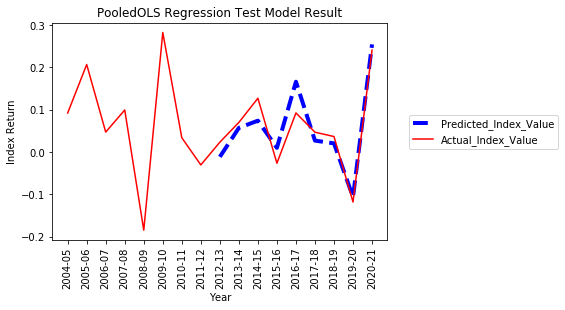

In [56]:
#Plotting test train results 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#Plot a line graph
plt.plot(new_data['Predicted_Index_Value'], label='Predicted_Index_Value', color = 'Blue', linestyle='dashed', linewidth=4)
plt.plot(new_data['Nifty_500_Return'], label='Actual_Index_Value', color = 'Red')
 
# Add labels and title
plt.title("PooledOLS Regression Test Model Result")
plt.xlabel("Year")
plt.ylabel("Index Return")
plt.xticks(rotation=90) 

plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

## K-Fold cross validation

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


In [58]:
#Setting up features and targets for K-fold regression
Yearly_Macro_Model = Yearly_Macro_Model.groupby('Year').mean()
feature_names = ['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']
Target = Yearly_Macro_Model.Nifty_500_Return
Predictors = Yearly_Macro_Model[feature_names]
X = Predictors 
y = Target
X.iloc[2]

const                1.000000
Commodity_Index      0.034590
NEER                -0.007828
10_Year_Yield        0.027131
CPI                  3.106557
Nominal_GDP         16.198730
M2                   0.562377
FII_Inflows        -79.435492
Fiscal_Deficit    -293.737746
Name: 2006-07, dtype: float64

In [59]:
Yearly_Macro_Model = Yearly_Macro_Model.groupby(['Year']).mean() #Grouping Data by year
Yearly_Macro_Model = Yearly_Macro_Model.sort_index() #Sorting data chronologically

In [60]:
#Manual function for forward chained 2 fold cross validation data 
Yearly_Macro_Model = Yearly_Macro_Model.sort_index()
feature_names = ['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']
def Predicted_Index_Value_Model_2Year(df):
    feature_names = ['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']
    pred_list = []
    pred_list.append(None)
    for i in range(len(df)-1):
        y = df.loc[slice(df.index[i],df.index[i+1]),:]
        features = y[feature_names]
        targets = y['Nifty_500_Return']
        train_size = int(0.50*targets.shape[0])
        train_features = features[:train_size]
        train_targets = targets[:train_size]
        test_features = features[train_size:]
        test_targets = targets[train_size:]
        train_predictions = results.predict(train_features)
        test_predictions = results.predict(test_features)
        test_predictions = test_predictions.groupby(['Year']).mean()
        test_predictions =  test_predictions.to_frame(name='Predicted_Index_Value')
        test_predictions = test_predictions.iloc[0]['Predicted_Index_Value']
        pred_list.append(test_predictions)    
    df['Predicted_Index_Value']= pred_list 
    return df

In [61]:
#Setting up regression using training data
mod_1 = PooledOLS(train_targets,train_features)
pooled_res_1 = mod_1.fit()
print(pooled_res_1)

                          PooledOLS Estimation Summary                          
Dep. Variable:       Nifty_500_Return   R-squared:                        0.9216
Estimator:                  PooledOLS   R-squared (Between):              0.8702
No. Observations:                2067   R-squared (Within):               0.9219
Date:                Wed, Jul 07 2021   R-squared (Overall):              0.9216
Time:                        13:44:33   Log-likelihood                   -1358.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3022.5
Entities:                           9   P-value                           0.0000
Avg Obs:                       229.67   Distribution:                  F(8,2058)
Min Obs:                       117.00                                           
Max Obs:                       249.00   F-statistic (robust):             3022.5
                            

In [62]:
#Using manual function generated above to generate 2 fold forward chained predictions
df = Yearly_Macro_Model
Kfold_model = Predicted_Index_Value_Model_2Year(df)
Kfold_model.tail()

,Nifty_500_Return,Commodity_Index,NEER,10_Year_Yield,CPI,Nominal_GDP,M2,FII_Inflows,Fiscal_Deficit,const,Predicted_Index_Value
Year,,,,,,,,,,,
2016-17,0.092542,0.150833,0.023208,-0.045458,-6.391083,11.512083,0.018250,72.508000,-21.657750,1,0.166237
2017-18,0.047025,0.029339,-0.029835,0.045496,9.609669,10.936074,1.072645,265.256281,-39.599132,1,0.027169
2018-19,0.036777,0.000496,0.001322,-0.000661,7.226860,10.413595,0.790248,-170.123802,-151.947727,1,0.020696
2019-20,-0.117893,-0.170413,-0.017975,-0.071116,-2.523471,-0.267603,0.669421,-101.304504,-98.442397,1,-0.105949
2020-21,0.240902,0.285205,-0.006639,0.005205,1.553852,7.123730,1.155123,336.964344,-49.776721,1,0.254385


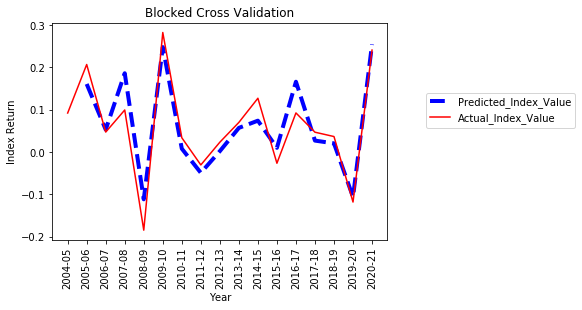

In [63]:
#Generating plot for 2 fold forward chained (blocked) cross validation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#Plot a line graph
plt.plot(Kfold_model['Predicted_Index_Value'], label='Predicted_Index_Value', color = 'Blue', linestyle='dashed', linewidth=4)
plt.plot(Kfold_model['Nifty_500_Return'], label='Actual_Index_Value', color = 'Red')
 
# Add labels and title
plt.title("Blocked Cross Validation")
plt.xlabel("Year")
plt.ylabel("Index Return")
plt.xticks(rotation=90) 


plt.legend(bbox_to_anchor = (1.10, 0.7))
plt.show()

## K -fold cross validation for regression

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

In [65]:
#Loading Data and aggregating
Yearly_Macro_Model = pd.read_csv('/Users/sanskritibajaj/Desktop/QuantechCap/YearlyNewMacroModel.csv')
Yearly_Macro_Model['const'] = 1
Yearly_Macro_Model = Yearly_Macro_Model.groupby(['Year']).mean()

In [66]:
#Setting up features and targets 
feature_names = ['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']
Target = Yearly_Macro_Model.Nifty_500_Return
Predictors = Yearly_Macro_Model[feature_names]
Predictors.shape, Target.shape
X = Predictors
y = Target

In [67]:
#Printing K-fold R2 values for different folds 
for i in range(2,10):
    reg = LinearRegression()
    cv_results = cross_val_score(reg, X, y, cv=i)
    np.mean(cv_results)
    print("Average {}-Fold CV Score: {}".format(i,np.mean(cv_results)))
print("Note - Results only generated only for checking implementation, time series data cannot be cross validated using K-fold method")

Average 2-Fold CV Score: -287.79505603778034
Average 3-Fold CV Score: -0.3713584506444247
Average 4-Fold CV Score: -2.3539880746650734
Average 5-Fold CV Score: -1.9456632302139787
Average 6-Fold CV Score: -44.929697686189975
Average 7-Fold CV Score: -36.91507103946183
Average 8-Fold CV Score: -52.842549198316846
Average 9-Fold CV Score: nan
Note - Results only generated only for checking implementation, time series data cannot be cross validated using K-fold method


/Users/sanskritibajaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## TimeSeries Split Cross Validation

In [68]:
#Setting up features and targets for cross validation
feature_names = ['const','Commodity_Index', 'NEER', '10_Year_Yield', 'CPI', 'Nominal_GDP', 'M2','FII_Inflows','Fiscal_Deficit']
Target = Yearly_Macro_Model.Nifty_500_Return
Predictors = Yearly_Macro_Model[feature_names]
Predictors.shape, Target.shape
X = Predictors
y = Target
X = X.to_numpy()
y = y.to_numpy()
X.shape, y.shape

((17, 9), (17,))

In [69]:
#Setting time series split 
tscv = TimeSeriesSplit()
print(tscv)

TimeSeriesSplit(max_train_size=None, n_splits=5)


In [70]:
#Setting up Time Series Split 
#This function returns the index of avlues to be taken for testing and training
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


TRAIN: [0 1 2 3 4 5 6] TEST: [7 8]
TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [ 9 10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10] TEST: [11 12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13 14]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [15 16]


# # Split level 1 

In [71]:
# Make predictions from our model for train and test sets
X_train = X[0:6]
X_test = X[7:9]
train_predictions = results.predict(X_train)
test_predictions = results.predict(X_test)
# Make predictions from our model for train and test sets
train_predictions = results.predict(X_train)
test_predictions = results.predict(X_test)
Yearly_Macro_Model_1 = Yearly_Macro_Model.iloc[:9]
Yearly_Macro_Model_1["Predicted_Index_Value"] = NaN
Yearly_Macro_Model_1.iloc[-2, Yearly_Macro_Model_1.columns.get_loc('Predicted_Index_Value')] = test_predictions[0]
Yearly_Macro_Model_1.iloc[-1, Yearly_Macro_Model_1.columns.get_loc('Predicted_Index_Value')] = test_predictions[1]
Yearly_Macro_Model_1.index


/Users/sanskritibajaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/sanskritibajaj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Index(['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10',
       '2010-11', '2011-12', '2012-13'],
      dtype='object', name='Year')

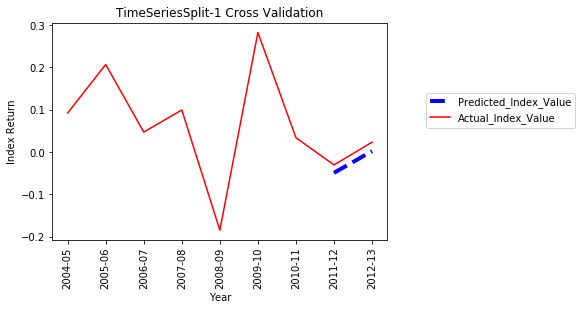

In [72]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#Plot a line graph
plt.plot(Yearly_Macro_Model_1['Predicted_Index_Value'], label='Predicted_Index_Value', color = 'Blue', linestyle='dashed', linewidth=4)
plt.plot(Yearly_Macro_Model_1['Nifty_500_Return'], label='Actual_Index_Value', color = 'Red')
 
# Add labels and title
plt.title("TimeSeriesSplit-1 Cross Validation")
plt.xlabel("Year")
plt.ylabel("Index Return")
plt.xticks(rotation=90) 


plt.legend(bbox_to_anchor = (1.10, 0.7))
plt.show()

# Split level 2

In [73]:
X_train = X[0:8]
X_test = X[9:11]
train_predictions = results.predict(X_train)
test_predictions = results.predict(X_test)

# Make predictions from our model for train and test sets
train_predictions = results.predict(X_train)
test_predictions = results.predict(X_test)
Yearly_Macro_Model_2 = Yearly_Macro_Model.iloc[:11]
Yearly_Macro_Model_2["Predicted_Index_Value"] = NaN
Yearly_Macro_Model_2.iloc[-2, Yearly_Macro_Model_2.columns.get_loc('Predicted_Index_Value')] = test_predictions[0]
Yearly_Macro_Model_2.iloc[-1, Yearly_Macro_Model_2.columns.get_loc('Predicted_Index_Value')] = test_predictions[1]

/Users/sanskritibajaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/sanskritibajaj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


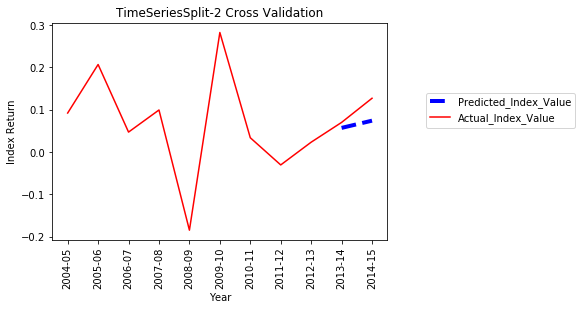

In [74]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#Plot a line graph
plt.plot(Yearly_Macro_Model_2['Predicted_Index_Value'], label='Predicted_Index_Value', color = 'Blue', linestyle='dashed', linewidth=4)
plt.plot(Yearly_Macro_Model_2['Nifty_500_Return'], label='Actual_Index_Value', color = 'Red')
 
# Add labels and title
plt.title("TimeSeriesSplit-2 Cross Validation")
plt.xlabel("Year")
plt.ylabel("Index Return")
plt.xticks(rotation=90) 


plt.legend(bbox_to_anchor = (1.10, 0.7))
plt.show()

# Split level 3 

In [75]:
X_train = X[0:10]
X_test = X[11:13]
train_predictions = results.predict(X_train)
test_predictions = results.predict(X_test)

# Make predictions from our model for train and test sets
train_predictions = results.predict(X_train)
test_predictions = results.predict(X_test)
Yearly_Macro_Model_3 = Yearly_Macro_Model.iloc[:13]
Yearly_Macro_Model_3["Predicted_Index_Value"] = NaN
Yearly_Macro_Model_3.iloc[-2, Yearly_Macro_Model_3.columns.get_loc('Predicted_Index_Value')] = test_predictions[0]
Yearly_Macro_Model_3.iloc[-1, Yearly_Macro_Model_3.columns.get_loc('Predicted_Index_Value')] = test_predictions[1]

/Users/sanskritibajaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/sanskritibajaj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


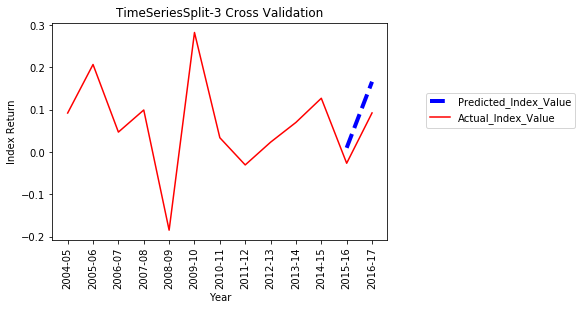

In [76]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#Plot a line graph
plt.plot(Yearly_Macro_Model_3['Predicted_Index_Value'], label='Predicted_Index_Value', color = 'Blue', linestyle='dashed', linewidth=4)
plt.plot(Yearly_Macro_Model_3['Nifty_500_Return'], label='Actual_Index_Value', color = 'Red')
 
# Add labels and title
plt.title("TimeSeriesSplit-3 Cross Validation")
plt.xlabel("Year")
plt.ylabel("Index Return")
plt.xticks(rotation=90) 


plt.legend(bbox_to_anchor = (1.10, 0.7))
plt.show()

# Split level 4 

In [77]:
X_train = X[0:12]
X_test = X[13:15]
train_predictions = results.predict(X_train)
test_predictions = results.predict(X_test)

# Make predictions from our model for train and test sets
train_predictions = results.predict(X_train)
test_predictions = results.predict(X_test)
Yearly_Macro_Model_4 = Yearly_Macro_Model.iloc[:15]
Yearly_Macro_Model_4["Predicted_Index_Value"] = NaN
Yearly_Macro_Model_4.iloc[-2, Yearly_Macro_Model_4.columns.get_loc('Predicted_Index_Value')] = test_predictions[0]
Yearly_Macro_Model_4.iloc[-1, Yearly_Macro_Model_4.columns.get_loc('Predicted_Index_Value')] = test_predictions[1]

/Users/sanskritibajaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/sanskritibajaj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


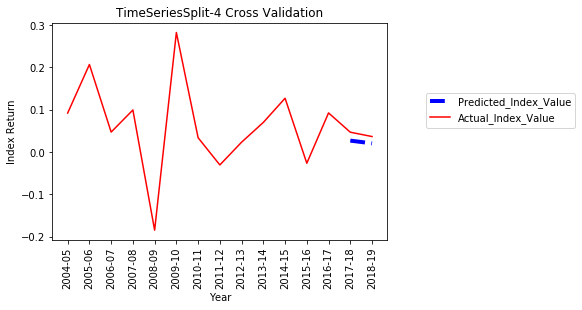

In [78]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#Plot a line graph
plt.plot(Yearly_Macro_Model_4['Predicted_Index_Value'], label='Predicted_Index_Value', color = 'Blue', linestyle='dashed', linewidth=4)
plt.plot(Yearly_Macro_Model_4['Nifty_500_Return'], label='Actual_Index_Value', color = 'Red')
 
# Add labels and title
plt.title("TimeSeriesSplit-4 Cross Validation")
plt.xlabel("Year")
plt.ylabel("Index Return")
plt.xticks(rotation=90) 


plt.legend(bbox_to_anchor = (1.10, 0.7))
plt.show()

## Split level 5

In [79]:
# Make predictions from our model for train and test sets
X_train = X[0:14]
X_test = X[15:17]
train_predictions = results.predict(X_train)
test_predictions = results.predict(X_test)

# Make predictions from our model for train and test sets
train_predictions = results.predict(X_train)
test_predictions = results.predict(X_test)
Yearly_Macro_Model_5 = Yearly_Macro_Model.iloc[:17]
Yearly_Macro_Model_5["Predicted_Index_Value"] = NaN
Yearly_Macro_Model_5.iloc[-2, Yearly_Macro_Model_5.columns.get_loc('Predicted_Index_Value')] = test_predictions[0]
Yearly_Macro_Model_5.iloc[-1, Yearly_Macro_Model_5.columns.get_loc('Predicted_Index_Value')] = test_predictions[1]

/Users/sanskritibajaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/sanskritibajaj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


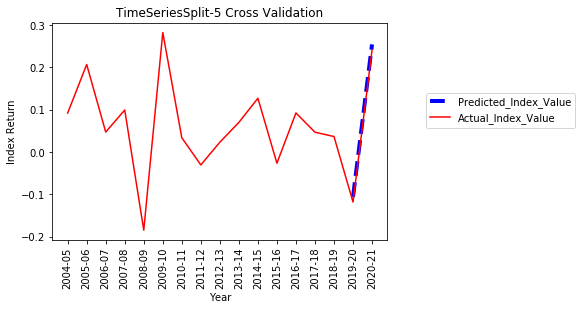

In [80]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#Plot a line graph
plt.plot(Yearly_Macro_Model_5['Predicted_Index_Value'], label='Predicted_Index_Value', color = 'Blue', linestyle='dashed', linewidth=4)
plt.plot(Yearly_Macro_Model_5['Nifty_500_Return'], label='Actual_Index_Value', color = 'Red')
 
# Add labels and title
plt.title("TimeSeriesSplit-5 Cross Validation")
plt.xlabel("Year")
plt.ylabel("Index Return")
plt.xticks(rotation=90) 


plt.legend(bbox_to_anchor = (1.10, 0.7))
plt.show()

Text(0.5, 0, 'Year')

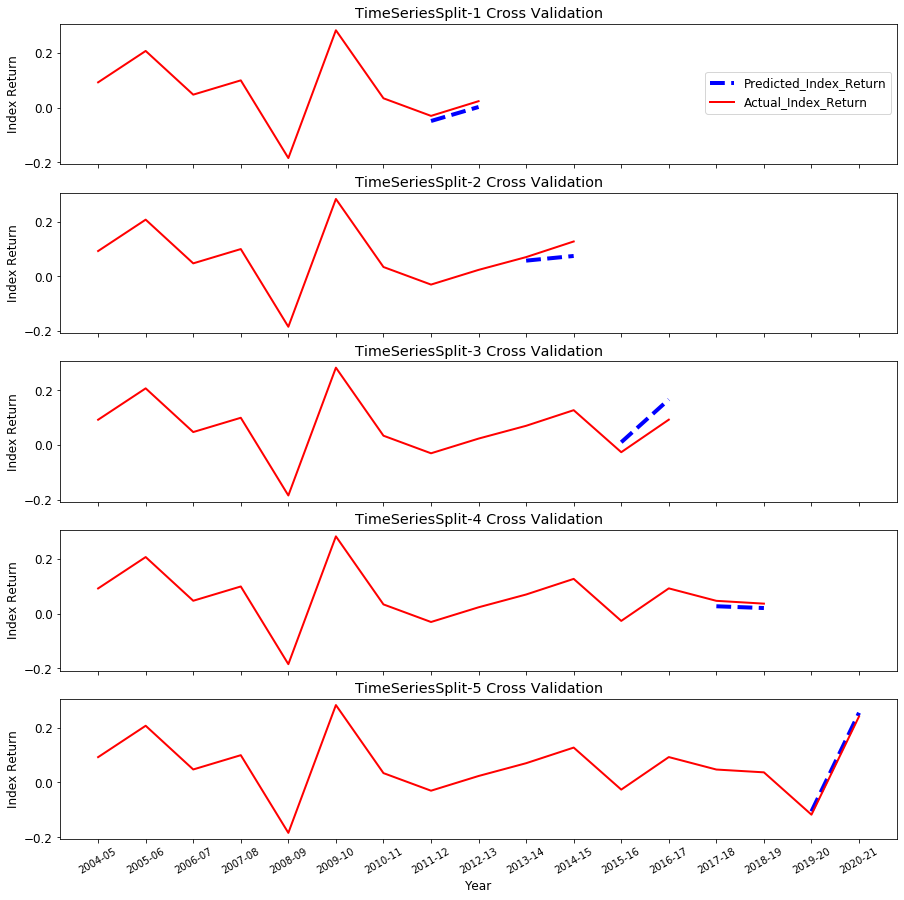

In [81]:
plt.rc('font', size=12)
fig, axs = plt.subplots(5, 1, figsize=(15,15), sharex=True)
axs = axs.flatten()
axs[0].plot(Yearly_Macro_Model_1.index , Yearly_Macro_Model_1.Predicted_Index_Value, color='blue',linewidth=4, linestyle='--',label='Predicted_Index_Return')
axs[0].plot(Yearly_Macro_Model_1.index , Yearly_Macro_Model_1.Nifty_500_Return, color='red', label='Actual_Index_Return',linewidth=2)
axs[0].set_title('TimeSeriesSplit-1 Cross Validation')
axs[0].legend(bbox_to_anchor = (1, 0.7))
axs[0].set_ylabel('Index Return')
axs[1].plot(Yearly_Macro_Model_2.index , Yearly_Macro_Model_2.Predicted_Index_Value, color='blue',linewidth=4, linestyle='--',label='Predicted_Index_Return')
axs[1].plot(Yearly_Macro_Model_2.index , Yearly_Macro_Model_2.Nifty_500_Return, color='red', label='Actual_Index_Return',linewidth=2)
axs[1].set_title('TimeSeriesSplit-2 Cross Validation')
axs[1].set_ylabel('Index Return')
axs[2].plot(Yearly_Macro_Model_3.index , Yearly_Macro_Model_3.Predicted_Index_Value, color='blue',linewidth=4, linestyle='--',label='Predicted_Index_Return')
axs[2].plot(Yearly_Macro_Model_3.index , Yearly_Macro_Model_3.Nifty_500_Return, color='red', label='Actual_Index_Return',linewidth=2)
axs[2].set_title('TimeSeriesSplit-3 Cross Validation')
axs[2].set_ylabel('Index Return')
axs[3].plot(Yearly_Macro_Model_4.index , Yearly_Macro_Model_4.Predicted_Index_Value, color='blue',linewidth=4, linestyle='--',label='Predicted_Index_Return')
axs[3].plot(Yearly_Macro_Model_4.index , Yearly_Macro_Model_4.Nifty_500_Return, color='red', label='Actual_Index_Return',linewidth=2)
axs[3].set_title('TimeSeriesSplit-4 Cross Validation')
axs[3].set_ylabel('Index Return')
axs[4].plot(Yearly_Macro_Model_5.index , Yearly_Macro_Model_5.Predicted_Index_Value, color='blue',linewidth=4, linestyle='--',label='Predicted_Index_Return')
axs[4].plot(Yearly_Macro_Model_5.index , Yearly_Macro_Model_5.Nifty_500_Return, color='red', label='Actual_Index_Return',linewidth=2)
axs[4].set_title('TimeSeriesSplit-5 Cross Validation')
axs[4].set_ylabel('Index Return')
axs[4].tick_params(axis='x', rotation=30, labelsize = 10)
axs[4].set_xlabel('Year')

In [82]:
Yearly_Macro_Model.loc[Yearly_Macro_Model.index[7], 'Predicted_Index_Value']= Yearly_Macro_Model_1.iloc[7]['Predicted_Index_Value']

In [83]:
Yearly_Macro_Model.loc[Yearly_Macro_Model.index[8], 'Predicted_Index_Value']= Yearly_Macro_Model_1.iloc[8]['Predicted_Index_Value']

In [84]:
Yearly_Macro_Model.loc[Yearly_Macro_Model.index[9], 'Predicted_Index_Value']= Yearly_Macro_Model_2.iloc[9]['Predicted_Index_Value']

In [85]:
Yearly_Macro_Model.loc[Yearly_Macro_Model.index[10], 'Predicted_Index_Value']= Yearly_Macro_Model_2.iloc[10]['Predicted_Index_Value']

In [86]:
Yearly_Macro_Model.loc[Yearly_Macro_Model.index[11], 'Predicted_Index_Value']= Yearly_Macro_Model_3.iloc[11]['Predicted_Index_Value']

In [87]:
Yearly_Macro_Model.loc[Yearly_Macro_Model.index[12], 'Predicted_Index_Value']= Yearly_Macro_Model_3.iloc[12]['Predicted_Index_Value']

In [88]:
Yearly_Macro_Model.loc[Yearly_Macro_Model.index[13], 'Predicted_Index_Value']= Yearly_Macro_Model_4.iloc[13]['Predicted_Index_Value']

In [89]:
Yearly_Macro_Model.loc[Yearly_Macro_Model.index[14], 'Predicted_Index_Value']= Yearly_Macro_Model_4.iloc[14]['Predicted_Index_Value']

In [90]:
Yearly_Macro_Model.loc[Yearly_Macro_Model.index[15], 'Predicted_Index_Value']= Yearly_Macro_Model_5.iloc[15]['Predicted_Index_Value']

In [91]:
Yearly_Macro_Model.loc[Yearly_Macro_Model.index[16], 'Predicted_Index_Value']= Yearly_Macro_Model_5.iloc[16]['Predicted_Index_Value']

In [92]:
Yearly_Macro_Model.head(17)

,Nifty_500_Return,Commodity_Index,NEER,10_Year_Yield,CPI,Nominal_GDP,M2,FII_Inflows,Fiscal_Deficit,const,Predicted_Index_Value
Year,,,,,,,,,,,
2004-05,0.092289,0.059277,-0.013293,0.109518,8.236024,16.837229,0.147671,55.525743,-96.583494,1,NaN
2005-06,0.206898,0.173061,0.000735,0.051388,1.424939,14.437265,0.743347,94.430898,-76.530245,1,NaN
2006-07,0.047295,0.034590,-0.007828,0.027131,3.106557,16.198730,0.562377,-79.435492,-293.737746,1,NaN
2007-08,0.099476,0.207460,-0.003710,-0.003145,2.465403,15.432460,1.082500,37.502298,-101.079798,1,NaN
2008-09,-0.184304,-0.148987,-0.049198,-0.037511,1.474937,13.718439,0.307679,-48.881814,101.256540,1,NaN
2009-10,0.282479,0.276933,0.030042,0.050672,4.611513,16.119370,0.778529,209.803067,-83.445084,1,NaN
2010-11,0.033952,0.003629,-0.014798,0.008710,-3.152097,18.310000,1.523871,8.062500,-38.478145,1,NaN
2011-12,-0.030249,-0.067469,-0.048133,0.031037,2.585934,12.868340,0.410456,5812.409917,-16.942780,1,-0.048946
2012-13,0.023441,-0.045628,-0.016761,-0.029271,0.330567,13.650405,0.329231,44.886154,-502.407530,1,0.002268


In [93]:
Yearly_Macro_Model['Variance'] = Yearly_Macro_Model['Nifty_500_Return'] - Yearly_Macro_Model["Predicted_Index_Value"]

In [94]:
Yearly_Macro_Model.iloc[-10:]['Variance']

Year
2011-12    0.018697
2012-13    0.021174
2013-14    0.012952
2014-15    0.052926
2015-16   -0.036410
2016-17   -0.073695
2017-18    0.019856
2018-19    0.016081
2019-20   -0.011943
2020-21   -0.013483
Name: Variance, dtype: float64